In [18]:
import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins, utils

import pprint
import csv
import numpy as np
import pandas as pd
import pickle
import glob
import csv
import base64
import ast
from collections import defaultdict
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import copy



plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size':20})
# %matplotlib inline

#mpld3 hack
import json
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        import numpy as np
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)
from mpld3 import _display
_display.NumpyEncoder = NumpyEncoder

### Read data

In [19]:
BASE_DIR = "./data/validation_exps/singlejob/run4/"
data = pd.read_csv(BASE_DIR + "infer_mgr_1_infer_stats.csv", header=None, names=["timestamp", "latency", "starttime", "endtime", "accuracy", "batchsize"])
gpu_data = pd.read_csv(BASE_DIR + "node_gpu_0.csv", header=None, names=["timestamp", "id", "load", "memoryTotal", "memoryUsed"])

In [32]:
start_timestamp = min(data["timestamp"])
infer_timestamps = data["timestamp"] - start_timestamp
data['acc_ma'] = data["accuracy"].rolling(window=10).mean()
infer_accuracy_data = data['acc_ma']

In [33]:
gpu_timestamps = gpu_data["timestamp"] - start_timestamp
gpu_load = gpu_data["load"]

Text(0.5,1,'Incremental learning - 0-60s start,\n 60-420s retrain with inference, 420-900s retrain complete\n Inference accuracy drop simulated')

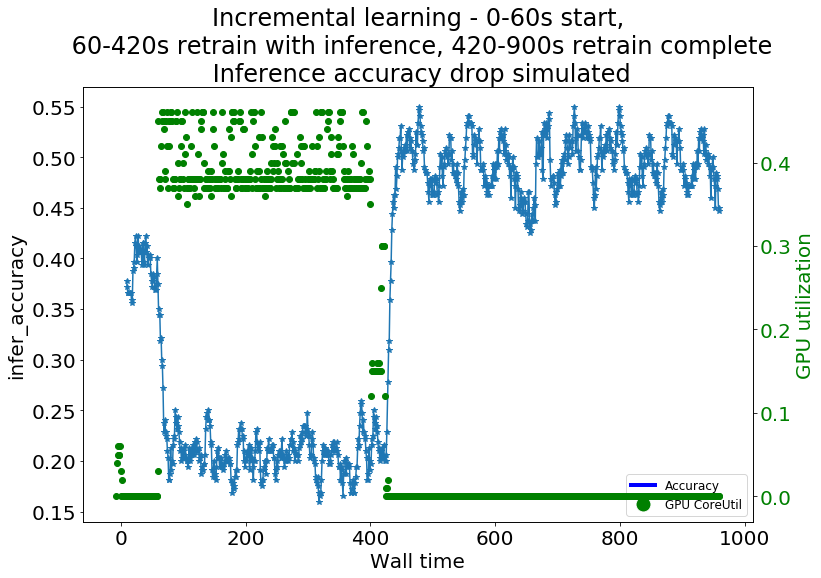

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(infer_timestamps, infer_accuracy_data, marker='*')
# ax1.scatter(gpu_timestamps, gpu_load, color='g')
# for c, c_data in infer_accuracy_per_class.items():
#     ax1.plot(infer_timestamps, c_data, marker='*')
ax1.set_ylabel('infer_accuracy')

ax2 = ax1.twinx()
ax2.scatter(gpu_timestamps, gpu_load, color='g')
ax2.set_ylabel('GPU utilization', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

ax1.set_xlabel("Wall time")

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Accuracy'),
                   Line2D([0], [0], marker='o', color='w', label='GPU CoreUtil',
                          markerfacecolor='g', markersize=15)]

# Create the figure
ax1.legend(handles=legend_elements, loc='lower right', prop={'size': 12})
plt.title("Incremental learning - 0-60s start,\n 60-420s retrain with inference, 420-900s retrain complete\n Inference accuracy drop simulated")

In [41]:
data[data["timestamp"] < start_timestamp + 50]["accuracy"].mean()

0.39221938775510207

In [42]:
data[data["timestamp"] > start_timestamp + 450]["accuracy"].mean()

0.4943296370967742